# The Network and Trajectories of Transitions 
# among Sentential Co-Occurrences of Characters of
# William Shakespeare's *Hamlet* 
## By Moses Boudourides & Sergios Lenis 

**IMPORTANT**: To use this notebook, you'll need to

1. Install IPython Notebook (easiest way: use [Anaconda](http://store.continuum.io))
2. Download this notebook and all other Python scripts used here from [https://github.com/mboudour/WordNets/blob/master/Shakespeare_Hamlet_Network&Trajectories.ipynb](https://github.com/mboudour/WordNets/blob/master/Shakespeare_Hamlet_Network&Trajectories.ipynb)
3. Run `ipython notebook` in the same directory where notebook and scripts were put

<a href="http://creativecommons.org/licenses/by/4.0/"><img alt="Creative Commons License" style="border-width:0" src="http://i.creativecommons.org/l/by/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by/4.0/">Creative Commons Attribution 4.0 International License</a>.

## Importing Python modules 

In [1]:
import random
import nltk
import codecs
from textblob import TextBlob
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import os
import imp

# utilsdir='/home/sergios-len/Dropbox/Python Projects (1)/utils/'#tools.py'
utilsdir='/home/mab/Dropbox/Python Projects/utils/'#tools.py'

%matplotlib inline 
%load_ext autoreload

/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


## I. Importing the Text of William Shakespeare's *Hamlet* 

### The transcript of William Shakespeare's Hamlet was downloaded from http://shakespeare.mit.edu/hamlet/full.html (accessed on 4-18-2016) 

In [2]:
filename = 'Hamlet: Entire Play.txt'
titlename = "Shakespear's Hamlet"

f=open(filename)

num_lines = 0
num_words = 0
num_chars = 0
names=set()
for line in f:
    
    words = line.split()
    num_lines += 1
    num_words += len(words)
    num_chars += len(line)
    lin=line.strip()
    if len(lin)>0:
        if lin[0]=='*' and lin[-1]=='*':
            lin=lin[1:-1]
            if '*' in lin:                
                nlin=lin.split()
                for nl in nlin:
                    nl=nl.strip('*')
                    names.add(nl.strip(':'))
            else:
                names.add(lin)
print "%s has number of words = %i and number of characters = %i" %(titlename,num_words,num_chars)

f = codecs.open(filename, "r", encoding="utf-8").read()

Shakespear's Hamlet has number of words = 32015 and number of characters = 197464


## II. Counting Sentential Co-Occurrences of Characters of William Shakespeare's *Hamlet*  and Measuring Sentential Sentiment Polarities and Subjectivities

In [3]:
# "names" are defined as the the words in lines of the text that including a single word.

list(names)

['GUILDENSTERN',
 'First Priest',
 'Gentleman',
 'LUCIANUS',
 'OSRIC',
 'Lord',
 'PRINCE FORTINBRAS',
 'First Ambassador',
 'MARCELLUS',
 'ROSENCRANTZ',
 'Captain',
 'Player King',
 'Ghost',
 'First Sailor',
 'HORATIO',
 'BERNARDO',
 'Servant',
 'LAERTES',
 'HAMLET',
 'Second Clown',
 'Prologue',
 'First Player',
 'First Clown',
 'All',
 'FRANCISCO',
 'LORD POLONIUS',
 'OPHELIA',
 'Danes',
 'REYNALDO',
 'VOLTIMAND',
 'KING CLAUDIUS',
 'Player Queen',
 'QUEEN GERTRUDE',
 'Messenger',
 'CORNELIUS']

In [4]:
dici={'GUILDENSTERN':'GUILDENSTERN',
 'First Priest':'Priest',
      'Priest':'Priest',
 'LUCIANUS':'Players',
      'Players':'Players',
 'OSRIC':'Osric',
 'PRINCE FORTINBRAS':'FORTINBRAS',
      'FORTINBRAS':'FORTINBRAS',
 'First Ambassador':'Ambassadors',
      'Ambassadors':'Ambassadors',
 'MARCELLUS':'Marcelius',
 'ROSENCRANTZ':'ROSENCRANTZ',
 'Captain':'Captain',
 'Player King':'Players',
 'Ghost':'Ghost',
 'First Sailor':'Sailors',
      'Sailor':'Sailors',
 'HORATIO':'Horatio',
 'BERNARDO':'Bernardo',
 'Servant':'Servant',
 'LAERTES':'Laertes',
 'HAMLET':'Hamlet',
      'Lord Hamlet':'Hamlet',
 'Second Clown':'Clowns',
 'First Player':'Players',
 'First Clown':'Clowns',
 'FRANCISCO':'Francisco',
 'LORD POLONIUS':'Polonius',
 'OPHELIA':'Ophelia',
 'Danes':'Danes',
 'REYNALDO':'Reynaldo',
 'VOLTIMAND':'VOLTIMAND',
 'KING CLAUDIUS':'Claudius',
      'Claudius':'Claudius',
 'Player Queen':'Players',
 'QUEEN GERTRUDE':'Gertrude',
      'Gertrude':'Gertrude',
 'Messenger':'Messenger',
 'CORNELIUS':'Cornelius'
     }

ndici={i.lower():k.lower().capitalize() for i,k in dici.items()}
dnici=[(i.split()[0],i.split()[1]) for i in ndici.keys() if len(i.split())>1]

selectedTerms=ndici.keys()
new_text={l:{} for l in selectedTerms}
f=open(filename)
chars=[]
texx=''
u=0
for lin in f:
    lin=lin.strip()
    if '*' in lin:
        if len(chars)>0 and len(texx)>0:
            for cr in chars:
                new_text[cr[0]][cr[1]]=texx
        chars=[]
        line= lin.split('*')
        
        for ll in line:
            if ll.lower() in selectedTerms:
                chars.append((ll.lower(),u))
        texx=''
    elif len(lin)>0 and lin[0] =='/':
        continue
    else:
        if len(chars)>0:
            texx+=lin
    u+=1     

In [5]:
%autoreload 2

tool= imp.load_source('tools', utilsdir+'tools.py')
# print dir(tool)

create_pandas_dataframe_from_text_par=tool.create_pandas_dataframe_from_text_par
create_coo_graph=tool.create_coo_graph


dfst,sec_prot,coccurlist,occurlist,dflines=create_pandas_dataframe_from_text_par(new_text,selectedTerms,ndici,titlename)
co_graph=create_coo_graph(coccurlist)

dfst.rename(columns={"Shakespeare's Hamlet selected terms":"Shakespeare's Hamlet"},inplace=True)
# dfst.rename(columns={"Arthur Conan Doyle's A Study in Scarlet selected terms":"Arthur Conan Doyle's A Study in Scarlet Characters"},inplace=True)
dfst.sort_values(by='Frequencies').sort(["Frequencies"], ascending=[0])

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:15: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


Shakespear's Hamlet selected terms  Frequencies
23                             Hamlet          424
10                            Horatio          139
13                           Claudius          104
8                            Polonius           86
1                             Laertes           84
0                            Gertrude           79
6                             Ophelia           78
21                        Rosencrantz           56
17                             Clowns           45
19                       Guildenstern           44
24                          Marcelius           42
4                            Bernardo           28
18                              Osric           27
15                            Players           19
14                           Reynaldo           16
9                               Ghost           14
12                         Fortinbras           12
3                           Francisco            9
20                            Captain            7
7                           Voltimand            4
22                              Danes            3
26                          Cornelius            3
5                             Sailors            2
2                           Messenger            2
16                             Priest            2
11                            Servant            1
25                        Ambassadors            1

In [6]:
prot_pol_sub=dflines[['narrator','protagonists','#_of_protagonists','polarity','subjectivity']].reset_index()
prot_pol_sub['sentence_id']=prot_pol_sub.index
prot_pol_sub=prot_pol_sub[['sentence_id','narrator','protagonists','#_of_protagonists','polarity','subjectivity']]

cuts = 1
prot_pol_sub = prot_pol_sub[prot_pol_sub['#_of_protagonists']>cuts]
lp = prot_pol_sub['protagonists'].tolist()
lpn = []
for i in lp:
    for j in i:
        lpn.append(j)
# len(set(lpn))
print "The total number of sentences in %s with at least %i characters in each one of them is %i." %(titlename,cuts+1,len(prot_pol_sub))
prot_pol_sub.rename(columns={'protagonists':'Lists_of_Characters','#_of_protagonists':'#_of_Characters','polarity':'Polarity','subjectivity':'Subjectivity'},inplace=True)
prot_pol_sub.sort(["#_of_Characters"], ascending=[0]) 
ddff = prot_pol_sub.drop('sentence_id', 1)
ddff.index.name = 'Sentence_ID'
ddff

The total number of sentences in Shakespear's Hamlet with at least 2 characters in each one of them is 29.


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:15: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


narrator                         Lists_of_Characters  \
Sentence_ID                                                            
64           Ambassadors                 [Guildenstern, Rosencrantz]   
202               Hamlet                 [Guildenstern, Rosencrantz]   
244               Hamlet                        [Gertrude, Claudius]   
260               Hamlet                        [Marcelius, Horatio]   
322               Hamlet                          [Horatio, Laertes]   
372               Hamlet                       [Horatio, Fortinbras]   
386               Hamlet                           [Laertes, Hamlet]   
449               Hamlet        [Ophelia, Guildenstern, Rosencrantz]   
527               Clowns                        [Fortinbras, Hamlet]   
568             Polonius                           [Ophelia, Hamlet]   
574             Polonius                           [Ophelia, Hamlet]   
627             Polonius                           [Ophelia, Hamlet]   
698              Horatio                       [Marcelius, Bernardo]   
702              Horatio         [Guildenstern, Rosencrantz, Hamlet]   
707              Horatio                        [Fortinbras, Hamlet]   
754              Horatio                 [Guildenstern, Rosencrantz]   
822             Bernardo                        [Marcelius, Horatio]   
828             Bernardo                        [Marcelius, Horatio]   
898             Gertrude                           [Ophelia, Hamlet]   
954             Gertrude         [Guildenstern, Rosencrantz, Hamlet]   
1038            Claudius                 [Gertrude, Ophelia, Hamlet]   
1051            Claudius                         [Gertrude, Horatio]   
1053            Claudius                         [Gertrude, Laertes]   
1063            Claudius                          [Gertrude, Hamlet]   
1069            Claudius            [Gertrude, Guildenstern, Hamlet]   
1084            Claudius  [Cornelius, Fortinbras, Voltimand, Hamlet]   
1091            Claudius                 [Guildenstern, Rosencrantz]   
1098            Claudius         [Guildenstern, Rosencrantz, Hamlet]   
1104            Claudius                           [Laertes, Hamlet]   

             #_of_Characters  Polarity  Subjectivity  
Sentence_ID                                           
64                         2  0.200000      0.200000  
202                        2  0.900000      0.733333  
244                        2  0.006250      0.525000  
260                        2  0.700000      0.600000  
322                        2 -0.083333      0.581481  
372                        2  0.378788      0.500000  
386                        2 -0.216667      0.800000  
449                        3  0.000000      0.000000  
527                        2  0.000000      0.066667  
568                        2  0.048701      0.432468  
574                        2  0.470000      0.500000  
627                        2  0.180000      0.380000  
698                        2 -0.152500      0.470000  
702                        3  0.275000      0.462500  
707                        2  0.143750      0.426042  
754                        2  0.000000      0.000000  
822                        2  0.700000      0.600000  
828                        2  0.766667      0.800000  
898                        2  0.750000      0.800000  
954                        3  0.150000      0.466667  
1038                       3  0.062500      0.487500  
1051                       2  0.140000      0.260000  
1053                       2 -0.093750      0.500000  
1063                       2  0.000000      0.000000  
1069                       3  0.137500      0.537500  
1084                       4  0.102536      0.441667  
1091                       2  0.200000      0.500000  
1098                       3  0.129167      0.433333  
1104                       2  0.850000      0.600000

### Basic Univarate Statistics of Selected Sentences in William Shakespeare's *Hamlet* 

In [7]:
prot_pol_sub[['#_of_Characters','Polarity','Subjectivity']].describe()

#_of_Characters   Polarity  Subjectivity
count        29.000000  29.000000     29.000000
mean          2.275862   0.232573      0.451867
std           0.527565   0.318909      0.224973
min           2.000000  -0.216667      0.000000
25%           2.000000   0.000000      0.426042
50%           2.000000   0.140000      0.487500
75%           2.000000   0.378788      0.581481
max           4.000000   0.900000      0.800000

### The Histogram of the Number of Characters in the Selected Sentences in William Shakespeare's *Hamlet* 

In [8]:
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

ndfl=dflines[dflines['#_of_protagonists']>0  ]

fig, ax = plt.subplots(figsize=[12, 10])
axes2 = zoomed_inset_axes(ax, 12, loc=10)  # zoom = 6

dflines['#_of_protagonists'].plot.hist(ax=ax)

ax.set_xlabel('#_of_Characters')
ax.set_ylabel('Frequency')
ax.set_title('Histogram of # of characters')

x1, x2, y1, y2 = 3, 3.1, 0, 30
axes2.set_xlim(x1, x2)
axes2.set_ylim(y1, y2)
ndfl['#_of_protagonists'].plot.hist(ax=axes2)
axes2.set_ylabel('Frequency')

mark_inset(ax, axes2, loc1=2, loc2=4, fc="none", ec="0.5")
axes3 = zoomed_inset_axes(ax, 10, loc=6)

x1, x2, y1, y2 = 2, 2.1, 0, 60
axes3.set_xlim(x1, x2)
axes3.set_ylim(y1, y2)
ndfl['#_of_protagonists'].plot.hist(ax=axes3)
axes3.set_ylabel('Frequency')

mark_inset(ax, axes3, loc1=2, loc2=4, fc="none", ec="0.5")

axes4 = zoomed_inset_axes(ax, 10, loc=7)

x1, x2, y1, y2 = 3.9, 4, 0, 20
axes4.set_xlim(x1, x2)
axes4.set_ylim(y1, y2)
ndfl['#_of_protagonists'].plot.hist(ax=axes4)
axes3.set_ylabel('Frequency')

mark_inset(ax, axes4, loc1=2, loc2=4, fc="none", ec="0.5")
plt.show()

## III. The Two-Mode Network of Characters and Sentences in William Shakespeare's *Hamlet* 

In [9]:
%autoreload 2
import math

draw_network_node_color=tool.draw_network_node_color

sstt="%s Two-Mode Network of Sentences and Characters" %titlename
pos=nx.spring_layout(sec_prot)
nds=[nd for nd in sec_prot.nodes() if isinstance(nd,int)]
prot=[nd for nd in sec_prot.nodes() if nd not in nds]
qua=len(nds)/4.
for en,nd in enumerate(nds):  
    if en<qua:
        if en%2==0:
            rr=1.
        else:
            rr=.8
        the=math.pi*en/(190*72./len(nds))
        pos[nd][0]=rr*math.cos(the)
        pos[nd][1]=rr*math.sin(the)
    elif en<len(nds)/2. and en>qua:
        ens=en-qua
        the=math.pi*ens/(190*72./len(nds))
        if en%2==0:
            rr=1.
        else:
            rr=.8
        pos[nd][0]=-rr*math.cos(the)
        pos[nd][1]=rr*math.sin(the)
    elif en<3*qua and en>2*qua:
        ens=en-2*qua
        the=math.pi*ens/(190*72./len(nds))
        if en%2==0:
            rr=1.
        else:
            rr=.8
        pos[nd][0]=-rr*math.cos(the)
        pos[nd][1]=-rr*math.sin(the)
    else:
        ens=en-3*qua
        the=math.pi*ens/(190*72./len(nds))
        if en%2==0:
            rr=1.
        else:
            rr=.8
        pos[nd][0]=rr*math.cos(the)
        pos[nd][1]=-rr*math.sin(the)
for en ,nd in enumerate(prot):
    pos[nd][0]=0
    pos[nd][1]=-0.95+en*2./len(prot)

possit=draw_network_node_color(sec_prot,sstt,pos=pos,with_edgewidth=False,withLabels=True,labfs=10,valpha=0.2,
                               ealpha=0.3,labelfont=5,with_node_weight=False,node_size_fixer=10.,node_col='polarity',
                              node_size_def=None)

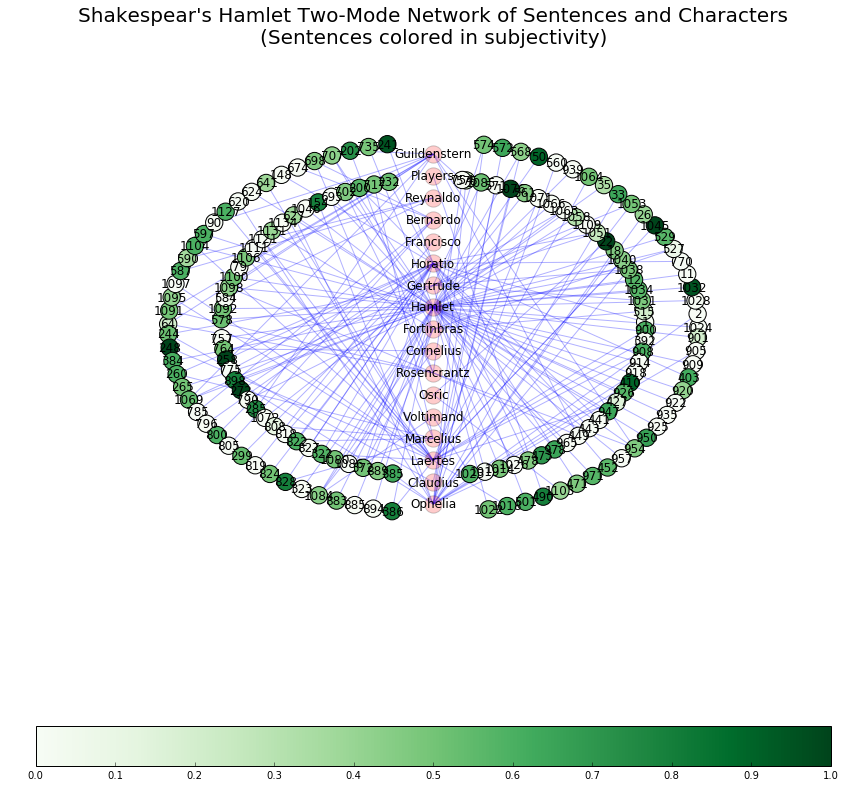

In [10]:
possit=draw_network_node_color(sec_prot,sstt,pos=pos,with_edgewidth=False,withLabels=True,labfs=12,valpha=0.2,
                               ealpha=0.3,labelfont=15,with_node_weight=False,node_size_fixer=300.,
                               node_col='subjectivity',colormat='Greens')

## IV. The Network of Sententially Co-Occurring Characters in William Shakespeare's *Hamlet* 

In [11]:
%autoreload 2

draw_network=tool.draw_network
make_graph_from_lists=tool.make_graph_from_lists


plist = prot_pol_sub['Lists_of_Characters'].tolist()
pplist=prot_pol_sub['Polarity'].tolist()
nplist=prot_pol_sub['#_of_Characters'].tolist()
splist=prot_pol_sub['Subjectivity'].tolist()

G = make_graph_from_lists(plist,pplist,nplist,splist)
posg=nx.spring_layout(G,scale=50,k=0.55,iterations=20)
# posg=nx.spring_layout(G,scale=50)#,k=0.55)#,iterations=20)

sstt="%s Network of Selected Characters \n(Sentences colored in polarity)" %titlename
possit=draw_network(G,sstt,pos=posg,with_edgewidth=True,withLabels=True,labfs=15,valpha=0.2,ealpha=0.7,labelfont=15,
                   with_edgecolor=True,edgecolor='polarity',colormat='Blues')

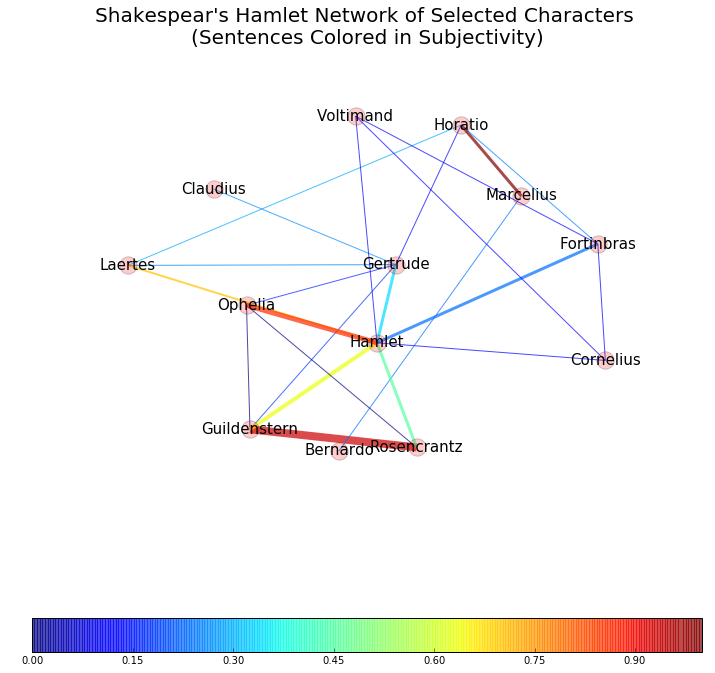

In [12]:
sstt="%s Network of Selected Characters \n(Sentences Colored in Subjectivity)" %titlename
possit=draw_network(G,sstt,pos=posg,with_edgewidth=True,withLabels=True,labfs=15,valpha=0.2,ealpha=0.7,labelfont=15,
                   with_edgecolor=True,edgecolor='subjectivity',colormat='Greys')

## V. Centralities of Nodes in the Network of Sententially Co-Occurring Characters in William Shakespeare's *Hamlet* 

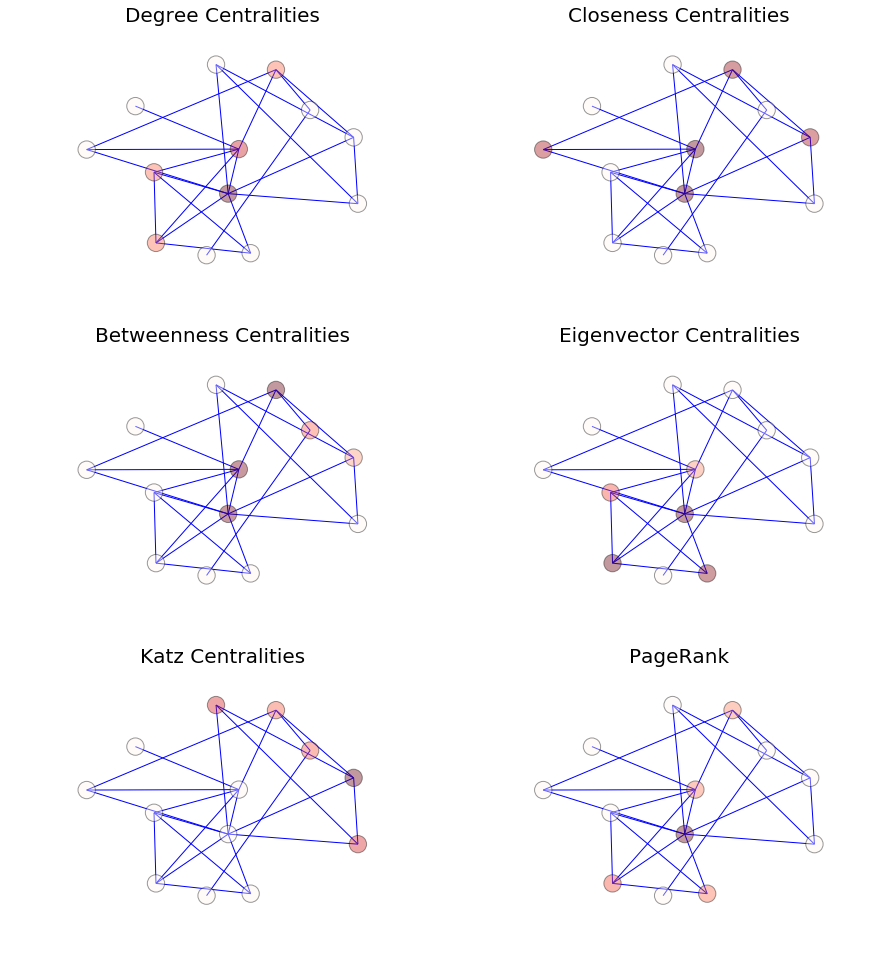

In [13]:
draw_centralities_subplots=tool.draw_centralities_subplots

centrali=draw_centralities_subplots(G,pos=posg,withLabels=False,labfs=5,figsi=(15,22),ealpha=1,vals=True)

### The table of Centralities of Nodes in the Network of Sententially Co-Occurring Characters in William Shakespeare's *Hamlet* 

In [14]:
dfc=pd.DataFrame()
u=0
for i,k in centrali.items():
    dfc.insert(u,i,k.values())
    u+=1
dfc.insert(0,'Nodes',centrali[centrali.keys()[0]].keys())
dfc

Nodes  closeness_centrality  katz_centrality  \
0       Gertrude              0.631579        -0.361305   
1   Guildenstern              0.521739         0.057981   
2        Horatio              0.571429         0.263886   
3       Bernardo              0.292683        -0.028698   
4    Rosencrantz              0.428571         0.089866   
5      Marcelius              0.400000         0.270646   
6        Ophelia              0.521739        -0.159546   
7        Laertes              0.545455        -0.187092   
8     Fortinbras              0.545455         0.488302   
9       Claudius              0.400000        -0.412946   
10        Hamlet              0.631579         0.053781   
11     Voltimand              0.480000         0.347849   
12     Cornelius              0.480000         0.347849   

    betweenness_centrality  page_rank  eigenvector_centrality  \
0                 0.315152   0.091428                0.209922   
1                 0.019192   0.117978                0.535084   
2                 0.325758   0.049481                0.058930   
3                 0.000000   0.026698                0.105691   
4                 0.000000   0.100620                0.000767   
5                 0.166667   0.071339                0.498772   
6                 0.019192   0.075191                0.009518   
7                 0.024242   0.087311                0.314295   
8                 0.115152   0.071048                0.058930   
9                 0.000000   0.021253                0.141081   
10                0.317677   0.205236                0.016919   
11                0.000000   0.041209                0.039110   
12                0.000000   0.041209                0.531165   

    degree_centrality  
0            0.500000  
1            0.333333  
2            0.333333  
3            0.083333  
4            0.250000  
5            0.166667  
6            0.333333  
7            0.250000  
8            0.333333  
9            0.083333  
10           0.666667  
11           0.250000  
12           0.250000

## VI. Communities of Nodes in the Network of Sententially Co-Occurring Characters in William Shakespeare's *Hamlet* 

Number of communities of Shakespear's Hamlet Network of Selected Characters 
(Sentences Colored in Subjectivity) = 4
Community partition of Shakespear's Hamlet Network of Selected Characters 
(Sentences Colored in Subjectivity):
[['Gertrude', 'Laertes', 'Ophelia', 'Claudius', 'Hamlet'], ['Guildenstern', 'Rosencrantz'], ['Bernardo', 'Marcelius', 'Horatio'], ['Fortinbras', 'Voltimand', 'Cornelius']]
Community modularity of Shakespear's Hamlet Network of Selected Characters 
(Sentences Colored in Subjectivity) = 0.2791


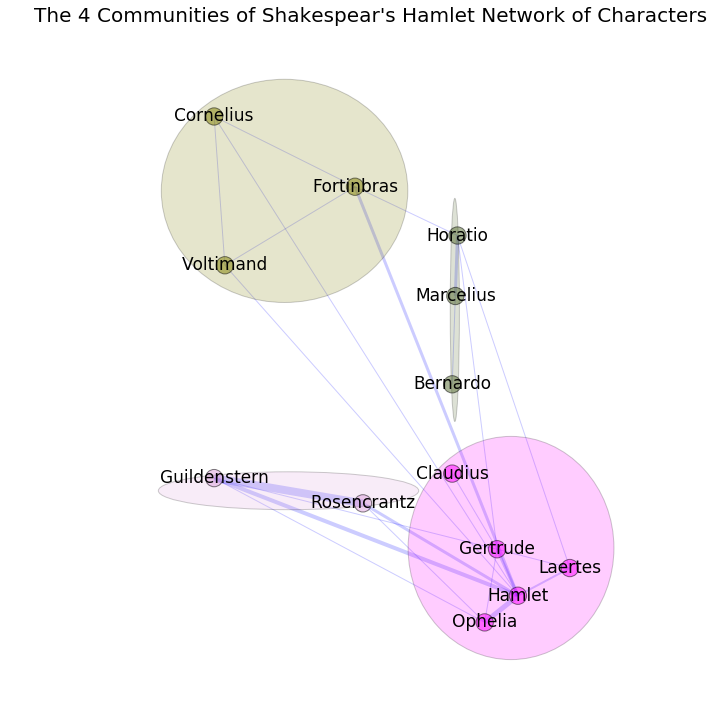

In [15]:
%autoreload 2

draw_comms=tool.draw_comms
modul_arity=tool.modul_arity
print_communities=tool.print_communities
part,nodper=print_communities(G,sstt)
ndfl=dflines[dflines['#_of_protagonists']>0  ]

d=0.8 
dd=0.8
c=1.2
cc=1.4
alpha=0.2
ealpha=0.2
vcc={}
sstta="The %s Communities of %s Network of Characters" %(max(part.values())+1,titlename)

draw_comms(G,G.nodes(),[],[],[] ,part,part,d,dd,c,cc,alpha,ealpha,nodper,sstta,titlefont=20,labelfont=17,valpha=0.5)

## VII. Trajectories of Transitions among Sentential Co-Occurrences in William Shakespeare's *Hamlet* 

### More about Transitions and Trajectories in Temporal Networks:

### http://www.slideshare.net/MosesBoudourides/trajectories1

In [16]:
%autoreload 2

trj= imp.load_source('trajectories', utilsdir+'trajectories_t.py')

### Transitions among Sentential Co-Occurrences of *Hamlet* and Other Characters 

In [17]:
def search_in_list(x):
    l=x['protagonists']
    return 'Hamlet' in l
ndfl=dflines[dflines['#_of_protagonists']>1  ]
dialogs=ndfl[ndfl.apply(search_in_list,axis=1) ==True]
protagonists=dialogs.protagonists.tolist()
start=range(1,len(protagonists)+1)
end=range(2,len(protagonists)+2)
polarities=dialogs.polarity.tolist()
subj=dialogs.subjectivity.tolist()
qq=0
figi=None
search_name='Hamlet'

G,ndls,pold,subjd=trj.creatTestGraph_pandas_bips(start,end,protagonists,search_name,polarities,subj)
trajpdfs=trj.main_work_search_name(G,ndls,qq,figi,search_name,verb=False,plot_first_mode=False)

['Gertrude', 'Guildenstern', 'Ophelia', 'Laertes', 'Fortinbras', 'Cornelius']

Statistics of trajectories of first mode vertices

Cornelius [['Hamlet__13', 'Hamlet__14']]
1 trajectories analyzed.
['Hamlet']

Statistics of trajectories of second mode vertices

Hamlet [['Laertes__1', 'Laertes__16']]
1 trajectories analyzed.


### Statistics of the Trajectory of Transitions among Sentential Co-Occurrences of *Hamlet* and Other Characters

In [18]:
trajpdfs["['Hamlet']"]

Vertices  fOriginator  fTransmitter  fTerminator  fBlackHole  \
0      Gertrude            0             1            0           0   
1  Guildenstern            0             3            0           0   
2       Ophelia            0             2            0           0   
3       Laertes            1             0            1           1   
4    Fortinbras            0             2            0           0   
5     Cornelius            0             1            0           0   

   fInvolvement  pOriginator  pTransmitter  pTerminator  pBlackHole  \
0             1            0             1            0           0   
1             1            0             3            0           0   
2             1            0             2            0           0   
3             1            1             0            1           1   
4             1            0             2            0           0   
5             1            0             1            0           0   

   lOriginator  lTransmitter  lTerminator  lBlackHole  lInvolvement  Position  \
0            0            11            0           0            11       8.0   
1            0            11            0           0            11       7.0   
2            0            11            0           0            11       4.5   
3           11             0           11           7            11       6.0   
4            0            11            0           0            11       3.5   
5            0            11            0           0            11       9.0   

   RelPosition  Betweenness  
0           70           21  
1           60           63  
2           35           32  
3           50            0  
4           25           18  
5           80           16

### The Trajectory of Transitions among Sentential Co-Occurrences of *Hamlet* and Other Characters:

#### Nodes are Co-Occurrences of *Hamlet* with Other Characters 

#### The Color of Nodes Corresponds to Sentential Sentiment Polarities Varying from Color Red (-1) to Color Green (1)

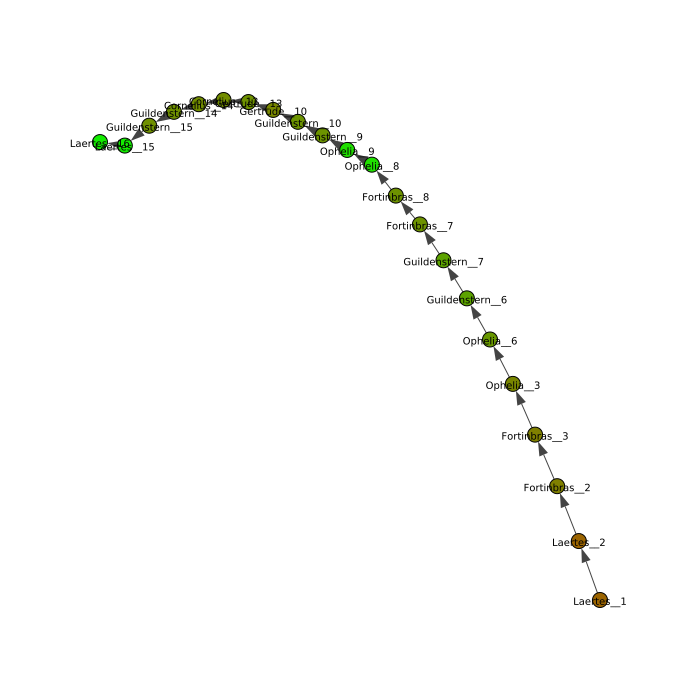

In [19]:
%autoreload 2
import igraph as ig

igraph_draw_traj=tool.igraph_draw_traj
filname='S_out_graphs/%s_graph.graphml' %search_name
g,visual_style,layout=igraph_draw_traj(filname,pold)

ig.plot(g,  **visual_style)

#### The Color of Nodes Corresponds to Sentential Sentiment Subjectivities Varying from Color Red (0) to Color Green (1)

In [20]:
g,visual_style,layout=igraph_draw_traj(filname,subjd,polar=False,layout=layout)

ig.plot(g,  **visual_style)

### Transitions among Sentential Co-Occurrences of *Gertrude* and Other Characters 

['Gertrude']

Statistics of trajectories of first mode vertices

Gertrude [['Claudius__1', 'Guildenstern__7']]
1 trajectories analyzed.
['Claudius', 'Laertes', 'Ophelia', 'Horatio', 'Guildenstern', 'Hamlet']

Statistics of trajectories of second mode vertices

Hamlet [['Gertrude__5', 'Gertrude__6']]
1 trajectories analyzed.


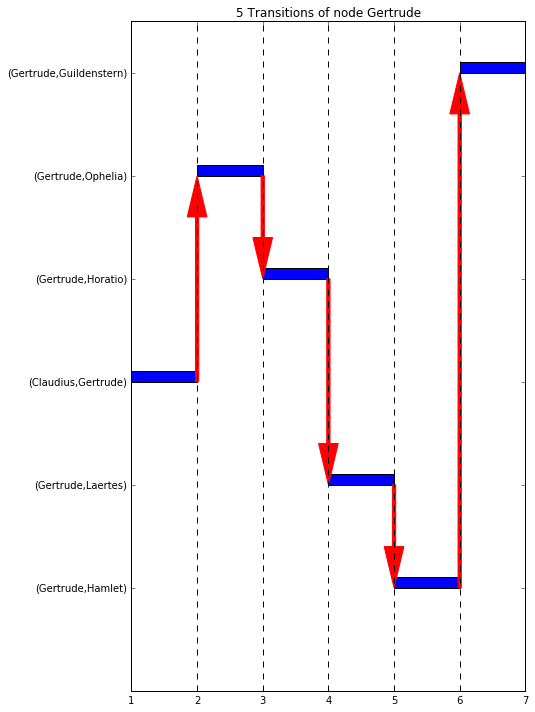

In [21]:
def search_in_list(x):
    l=x['protagonists']
    return 'Gertrude' in l
ndfl=dflines[dflines['#_of_protagonists']>1  ]
dialogs=ndfl[ndfl.apply(search_in_list,axis=1) ==True]
protagonists=dialogs.protagonists.tolist()
start=range(1,len(protagonists)+1)
end=range(2,len(protagonists)+2)
polarities=dialogs.polarity.tolist()
subj=dialogs.subjectivity.tolist()
qq=0
figi=None
search_name='Gertrude'

G,ndls,pold,subjd=trj.creatTestGraph_pandas_bips(start,end,protagonists,search_name,polarities,subj)

trajpdfs=trj.main_work_search_name(G,ndls,qq,figi,search_name,verb=False,plot_first_mode=False)

### Statistics of the Trajectory of Transitions among Sentential Co-Occurrences of *Gertrude* and Other Characters

In [22]:
trajpdfs["['Gertrude']"]

Vertices  fOriginator  fTransmitter  fTerminator  fBlackHole  \
0      Claudius            1             0            0           0   
1       Laertes            0             1            0           0   
2       Ophelia            0             1            0           0   
3       Horatio            0             1            0           0   
4  Guildenstern            0             0            1           0   
5        Hamlet            0             1            0           0   

   fInvolvement  pOriginator  pTransmitter  pTerminator  pBlackHole  \
0             1            1             0            0           0   
1             1            0             1            0           0   
2             1            0             1            0           0   
3             1            0             1            0           0   
4             1            0             0            1           0   
5             1            0             1            0           0   

   lOriginator  lTransmitter  lTerminator  lBlackHole  lInvolvement  Position  \
0            6             0            0           0             6         1   
1            0             6            0           0             6         4   
2            0             6            0           0             6         2   
3            0             6            0           0             6         3   
4            0             0            6           0             6         6   
5            0             6            0           0             6         5   

   RelPosition  Betweenness  
0            0            0  
1           60            6  
2           20            4  
3           40            6  
4          100            0  
5           80            4

### The Trajectory of Transitions among Sentential Co-Occurrences of *Gertrude* and Other Characters:

#### Nodes are Co-Occurrences of *Gertrude* with Other Characters 

#### The Color of Nodes Corresponds to Sentential Sentiment Polarities Varying from Color Red (-1) to Color Green (1)

In [23]:
%autoreload 2
import igraph as ig

filname='S_out_graphs/%s_graph.graphml' %search_name
g=None
g,visual_style,layout=igraph_draw_traj(filname,pold)

ig.plot(g,  **visual_style)

#### The Color of Nodes Corresponds to Sentential Sentiment Subjectivities Varying from Color Red (0) to Color Green (1)

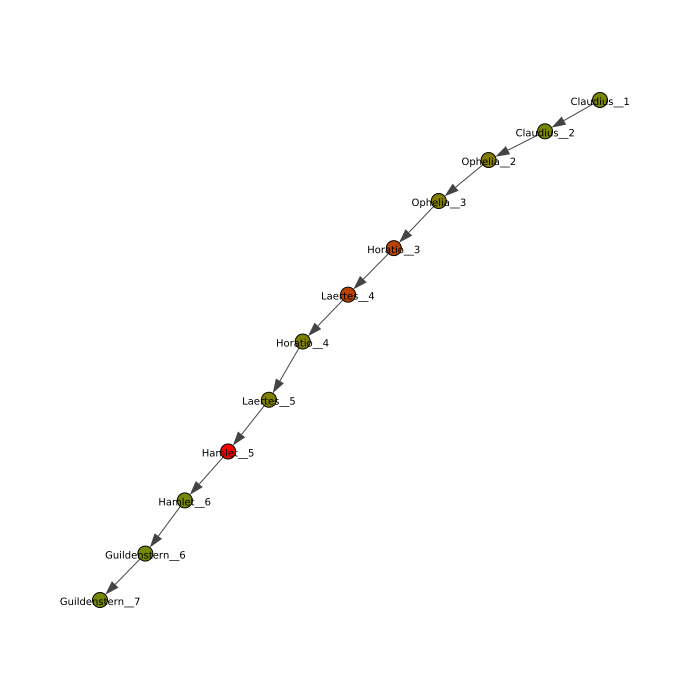

In [24]:
g,visual_style,layout=igraph_draw_traj(filname,subjd,polar=False,layout=layout)

ig.plot(g,  **visual_style)